**In this notebook, we will perform a time series analysis using the following tests: Stationarity Test, Cointegration Test, and Granger Causality Test**


### 1- Importing Dataset 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tqdm import tqdm_notebook
from itertools import product
import warnings


In [2]:
#importing the dataset
df= pd.read_csv('full_GDP_data.csv',index_col=0)
df.head(5)

,Exp_oil,Exp_food,Exp_cotton,Exp_chemical,Exp_electric,Exp_metel,Exp_vehicles,Imp_oil,Imp_food,Imp_cotton,Imp_chemical,Imp_electric,Imp_metel,Imp_vehicles,Totel_External_Debt,Net_Domestic_Debt,Government_Deposits,Net_Foreign,GDP_mp
Date,,,,,,,,,,,,,,,,,,,
30/09/2005,2137.8,142.6,236.8,172.8,123.1,328.8,32.7,1152.8,758.3,184.9,473.8,429.9,568.6,321.5,29674.4,355094,85937,1947.0,153.5
31/12/2005,2594.2,136.6,226.6,144.7,33.5,318.4,50.1,1406.0,736.1,194.2,456.0,393.6,531.2,347.4,29691.6,357643,86364,1366.2,147.4
31/03/2006,2707.6,143.4,287.8,155.4,108.9,371.8,34.3,1189.1,723.2,208.2,365.9,371.2,444.1,427.4,28938.6,374034,86752,1318.3,153.3
30/06/2006,2782.8,164.7,266.2,224.2,60.3,453.8,44.5,1611.3,733.6,205.7,540.1,480.0,680.3,552.8,29592.6,387719,82135,1479.9,163.5
30/09/2006,2512.5,177.1,265.8,288.3,96.8,728.5,35.9,1396.4,973.2,257.4,552.7,472.0,783.6,431.5,28950.9,446634,83403,3237.1,185.9


In [3]:
#change the place of the dependent variable(GDP_mp) to be the first culomn
column_to_move = df.pop("GDP_mp")

#insert column with insert(location, column_name, column_value)

df.insert(0, "GDP_mp", column_to_move)

In [4]:
df.tail(2)

,GDP_mp,Exp_oil,Exp_food,Exp_cotton,Exp_chemical,Exp_electric,Exp_metel,Exp_vehicles,Imp_oil,Imp_food,Imp_cotton,Imp_chemical,Imp_electric,Imp_metel,Imp_vehicles,Totel_External_Debt,Net_Domestic_Debt,Government_Deposits,Net_Foreign
Date,,,,,,,,,,,,,,,,,,,
31/03/2020,1024.4,2282.0,1062.0,589.1,718.2,406.5,293.6,91.8,2322.0,3238.8,927.4,1544.4,2790.3,1173.6,1280.2,111292.2,3944089,675792,970.5
30/06/2020,990.0,1153.0,1113.2,378.7,651.4,352.0,244.1,80.5,800.7,3260.9,705.6,1854.3,2870.1,1076.7,893.8,123490.5,4361420,744391,1524.0


# 2- Preparing Gdp dataset for the three tests for time series

In [5]:
#Make a copy from the origenal dataset
data_new=df.copy()
data_new.head()

,GDP_mp,Exp_oil,Exp_food,Exp_cotton,Exp_chemical,Exp_electric,Exp_metel,Exp_vehicles,Imp_oil,Imp_food,Imp_cotton,Imp_chemical,Imp_electric,Imp_metel,Imp_vehicles,Totel_External_Debt,Net_Domestic_Debt,Government_Deposits,Net_Foreign
Date,,,,,,,,,,,,,,,,,,,
30/09/2005,153.5,2137.8,142.6,236.8,172.8,123.1,328.8,32.7,1152.8,758.3,184.9,473.8,429.9,568.6,321.5,29674.4,355094,85937,1947.0
31/12/2005,147.4,2594.2,136.6,226.6,144.7,33.5,318.4,50.1,1406.0,736.1,194.2,456.0,393.6,531.2,347.4,29691.6,357643,86364,1366.2
31/03/2006,153.3,2707.6,143.4,287.8,155.4,108.9,371.8,34.3,1189.1,723.2,208.2,365.9,371.2,444.1,427.4,28938.6,374034,86752,1318.3
30/06/2006,163.5,2782.8,164.7,266.2,224.2,60.3,453.8,44.5,1611.3,733.6,205.7,540.1,480.0,680.3,552.8,29592.6,387719,82135,1479.9
30/09/2006,185.9,2512.5,177.1,265.8,288.3,96.8,728.5,35.9,1396.4,973.2,257.4,552.7,472.0,783.6,431.5,28950.9,446634,83403,3237.1


In [6]:
#convert data to datatime integer
data=data_new.astype(int)
data.head(2)

,GDP_mp,Exp_oil,Exp_food,Exp_cotton,Exp_chemical,Exp_electric,Exp_metel,Exp_vehicles,Imp_oil,Imp_food,Imp_cotton,Imp_chemical,Imp_electric,Imp_metel,Imp_vehicles,Totel_External_Debt,Net_Domestic_Debt,Government_Deposits,Net_Foreign
Date,,,,,,,,,,,,,,,,,,,
30/09/2005,153,2137,142,236,172,123,328,32,1152,758,184,473,429,568,321,29674,355094,85937,1947
31/12/2005,147,2594,136,226,144,33,318,50,1406,736,194,456,393,531,347,29691,357643,86364,1366


## 1- Apply Dickey-Fuller for test the Stationarity 

In [7]:
# Function to apply ADF test and check stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [8]:
# Apply ADF test for the dependent variable(GDP_mp)
adf_test(data['GDP_mp'])

Augmented Dickey-Fuller Test: 
ADF test statistic       0.045919
p-value                  0.962169
# lags used              4.000000
# observations          55.000000
critical value (1%)     -3.555273
critical value (5%)     -2.915731
critical value (10%)    -2.595670
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary



### Key Concepts in ADF Test

1. **Test Statistic**:
   - This value is calculated during the ADF test. It measures how strong the evidence is against the null hypothesis (which states that the series is non-stationary).
   - If the **test statistic** is **more negative** than the critical values, it suggests the time series is stationary.

2. **Critical Values**:
   - The ADF test provides critical values at confidence levels (1%, 5%, and 10%).
   - These values are the threshold for deciding stationarity.
   - If the test statistic is **less than** (more negative than) the critical value at a particular level (e.g., 5%), you can reject the null hypothesis, meaning the series is stationary.

3. **Stationarity Decision**:
   - If the test statistic is **less than** the critical value (e.g., -3.0131 < -2.91 at the 5% level), the series is considered **stationary**.
   - If the test statistic is **greater than** the critical value (e.g., 3.103 > -2.91), the series is considered **non-stationary**.

### Example Breakdown:

- **When Test Statistic = -3.0131**:
   - Suppose the critical value at the 5% confidence level is **-2.91**.
   - Since **-3.0131** is **less than** (more negative than) -2.91, we can reject the null hypothesis. Thus, the series is considered **stationary**.
  
- **When Test Statistic = 3.103**:
   - In this case, 3.103 is **greater than** the critical values (e.g., -2.91), meaning we **cannot reject the null hypothesis**. Thus, the series is **non-stationary**.

### Conclusion:

- A more **negative** test statistic (compared to critical values) indicates stationarity.
- A positive or less negative test statistic (greater than the critical values) suggests non-stationarity.

The **p-value** also helps reinforce this decision. A p-value less than 0.05 usually suggests stationarity.


In [9]:
# Apply ADF test for all feuters

#This fuction's aim is to apply nomber of differencing steps until the all features becomes stationary.

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 


In [10]:
for name, column in data.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GDP_mp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.0459
 No. Lags Chosen       = 4
 Critical value 1%     = -3.555
 Critical value 5%     = -2.916
 Critical value 10%    = -2.596
 => P-Value = 0.9622. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Exp_oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0132
 No. Lags Chosen       = 0
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.0337. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Exp_food" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Statio

In [11]:
# Another aprouch for ADF test 
from statsmodels.tsa.stattools import adfuller

def adf_test_safe(series):
    try:
        result = adfuller(series) 
        return {
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Critical Values': result[4]
        }
    except ValueError as e:
        # Handle cases where the ADF test cannot be performed
        return {
            'ADF Statistic': None,
            'p-value': None,
            'Critical Values': None,
            'Error': str(e)
        }

# Apply ADF test to all columns in the dataset with safe error handling
def adf_test_results_safe(data):
    adf_results = {}
    for col in data.columns:
        result = adf_test_safe(data[col])
        adf_results[col] = {
            'ADF Statistic': result.get('ADF Statistic'),
            'p-value': result.get('p-value'),
            'Is Stationary': 'Yes' if result.get('p-value') is not None and result.get('p-value') < 0.05 else 'No'
        }
    return pd.DataFrame(adf_results).T

# Run the ADF test for the dataset
stationarity_test_results_safe = adf_test_results_safe(data)

# Display the ADF test results safely
stationarity_test_results_safe


,ADF Statistic,p-value,Is Stationary
GDP_mp,0.045919,0.962169,No
Exp_oil,-3.013245,0.033676,Yes
Exp_food,-0.090482,0.950378,No
Exp_cotton,-2.510113,0.113033,No
Exp_chemical,-2.539865,0.106074,No
Exp_electric,-1.499246,0.533884,No
Exp_metel,-1.660949,0.451336,No
Exp_vehicles,-3.069546,0.028891,Yes
Imp_oil,-2.816507,0.055954,No
Imp_food,-2.069549,0.256934,No


**The zero differencing step show that all feature are NON-Stationary exept ( Exp_Food , Exp_vehicles , Imp_metel  , Imp_vehicles ) so we will take the first differencing step and check the result again**

In [12]:
import joblib

# Safe the model of stationary test
joblib.dump(stationarity_test_results_safe, 'seasonality_result.pkl')



['seasonality_result.pkl']

In [13]:
#Aplly the first differencing step
df_diff1 = data.diff().dropna()
# ADF Test on each column of 1st Difference633333333333+s Dataframe
for name, column in df_diff1.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GDP_mp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.985
 No. Lags Chosen       = 3
 Critical value 1%     = -3.555
 Critical value 5%     = -2.916
 Critical value 10%    = -2.596
 => P-Value = 0.0363. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Exp_oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1597
 No. Lags Chosen       = 0
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Exp_food" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level

**The First differencing step show that all feature became stationary exept ( Government_Deposits , Totel_External_Debt , Net_Domestic_Debt  , Exp_electric  ) so we will take the **second differencing step** and check the result again**

In [14]:
#Aplly the second differencing step
df_diff2 = df_diff1.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_diff2.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GDP_mp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -16.7847
 No. Lags Chosen       = 2
 Critical value 1%     = -3.555
 Critical value 5%     = -2.916
 Critical value 10%    = -2.596
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Exp_oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.0637
 No. Lags Chosen       = 3
 Critical value 1%     = -3.558
 Critical value 5%     = -2.917
 Critical value 10%    = -2.596
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Exp_food" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

**The Second differencing step show that all feature became stationary exept ( Exp_electric  ) so we will take the Third differencing step and check the result again**

In [15]:
#Aplly the Third differencing step
df_diff3 = df_diff2.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_diff3.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GDP_mp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7759
 No. Lags Chosen       = 9
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Exp_oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.0994
 No. Lags Chosen       = 7
 Critical value 1%     = -3.571
 Critical value 5%     = -2.923
 Critical value 10%    = -2.599
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Exp_food" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Leve

**After the Third differencing step the time series dataset became Statinary and all feature became too**

# 2-Testing Causation using Granger’s Causality Test


In [16]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the maximum number of lags for the Granger Causality test
maxlag = 3
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test'):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

# Example usage with your dataset
variables = df.columns
causation_matrix = grangers_causation_matrix(data, variables)

# Display the causation matrix
causation_matrix


,GDP_mp_x,Exp_oil_x,Exp_food_x,Exp_cotton_x,Exp_chemical_x,Exp_electric_x,Exp_metel_x,Exp_vehicles_x,Imp_oil_x,Imp_food_x,Imp_cotton_x,Imp_chemical_x,Imp_electric_x,Imp_metel_x,Imp_vehicles_x,Totel_External_Debt_x,Net_Domestic_Debt_x,Government_Deposits_x,Net_Foreign_x
GDP_mp_y,1.0000,0.0694,0.0000,0.0509,0.6008,0.3599,0.1959,0.2043,0.0001,0.0249,0.1511,0.1009,0.1138,0.8114,0.0798,0.0038,0.1011,0.0983,0.6059
Exp_oil_y,0.0326,1.0000,0.1122,0.0917,0.0101,0.0257,0.0094,0.1111,0.0363,0.2872,0.1164,0.0610,0.0670,0.5157,0.3283,0.0710,0.0535,0.0482,0.0624
Exp_food_y,0.0000,0.0513,1.0000,0.1026,0.2221,0.0000,0.0353,0.3018,0.0071,0.6239,0.0626,0.0201,0.0000,0.3757,0.1095,0.0000,0.0000,0.0000,0.1587
Exp_cotton_y,0.3214,0.4880,0.3903,1.0000,0.0340,0.1595,0.5358,0.1612,0.2763,0.0186,0.5394,0.4558,0.2651,0.6775,0.9892,0.2230,0.6251,0.6366,0.0599
Exp_chemical_y,0.1386,0.1479,0.0692,0.0219,1.0000,0.2010,0.6802,0.7793,0.1812,0.0003,0.0107,0.0460,0.0039,0.6729,0.4781,0.0447,0.2212,0.0919,0.1529
Exp_electric_y,0.0042,0.0840,0.0063,0.2680,0.2460,1.0000,0.5322,0.5736,0.1382,0.7157,0.1941,0.1434,0.1120,0.5322,0.0075,0.0899,0.0112,0.0278,0.3273
Exp_metel_y,0.0175,0.0892,0.0606,0.0000,0.0281,0.0130,1.0000,0.0227,0.0011,0.0290,0.0004,0.0001,0.0205,0.0001,0.0538,0.1231,0.0320,0.1078,0.3489
Exp_vehicles_y,0.2418,0.5828,0.2974,0.0322,0.0770,0.4738,0.2197,1.0000,0.1650,0.0660,0.4188,0.4867,0.3368,0.2559,0.0497,0.3574,0.2242,0.3000,0.2862
Imp_oil_y,0.0364,0.2690,0.4101,0.0632,0.1384,0.8104,0.5313,0.4638,1.0000,0.3033,0.1491,0.0738,0.3175,0.7730,0.1117,0.2301,0.9441,0.4968,0.2439
Imp_food_y,0.0044,0.1349,0.2353,0.0002,0.0000,0.0686,0.1195,0.4319,0.3012,1.0000,0.0002,0.0035,0.0014,0.0007,0.4966,0.0325,0.0126,0.0329,0.2735


### Granger Causality Matrix Explanation

The Granger Causality matrix shows the p-values for testing whether each variable Granger-causes another. Here's how to interpret the results:

- **Values below 0.05** indicate a statistically significant relationship, meaning the null hypothesis (that one variable does not Granger-cause the other) can be rejected.
- **Values above 0.05** suggest that the predictor variable does not Granger-cause the response variable

---

###  The Strongest features that Influence on GDP_mp?

To determine which factors have the strongest influence on **GDP_mp**, we focus on the variables with the smallest p-values in the Granger Causality matrix. These p-values show how strongly each variable influences GDP in terms of statistical significance, with smaller p-values indicating stronger influence. Below are the top factors with the strongest Granger-causal relationships:

### Top Factors Influencing **GDP_mp** (in order of strongest influence):

1. **Exp_cotton(p-value = 0.0509)**: Exportss of Cotton goods have the strongest influence on GDP.
2. **Exp_food (p-value = 0.0000)**: Exports of food have a very strong influence on GDP.
3. **Imp_food (p-value = 0.0044)**: Imports of food strongly influence GDP.
4. **Imp_oil (p-value = 0.0365)**: Imports of oil have a notable influence on GDP.
5. **Totel_External_Debt (p-value = 0.0038)**: External debt has a significant effect on GDP.

### Conclusion:

**The above features are key drivers for forecasting or understanding changes in GDP. So we will use only this features for prediction and forecasting GDP of Egypt**


In [17]:
# Safe the model of Causalty test
joblib.dump(causation_matrix, 'causation_matrix.pkl')



['causation_matrix.pkl']

**All the variables tested( Exp_vehicles , Imp_oil , Imp_food , Imp_cotton , Imp_chemical, Imp_electric , Imp_metel )
are cointegrated at the 95% significance level, meaning they are related in the long term. Even though they may fluctuate in the short term, these variables tend to move together in the long run. This can be important for building economic models, as it suggests that deviations from equilibrium are temporary and the system will return to a balanced relationship**

#  Features importance

## 3- ElisticNet Model

In [18]:

x_columns=df.drop(['GDP_mp'],axis=1)
y=df['GDP_mp']

In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_columns, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit ElasticNet model with increased iterations and regularization
model = ElasticNet(max_iter=10000, alpha=0.1, l1_ratio=0.5)  # Adjust l1_ratio as needed
model.fit(X_train_scaled, y_train)





ElasticNet(alpha=0.1, max_iter=10000)

In [26]:
# Get the feature importance (coefficients)
feature_importance = model.coef_

# Get feature names from the DataFrame
feature_names = x_columns.columns

# Create a DataFrame to easily visualize feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by the absolute value of importance
importance_df['Absolute Importance'] = np.abs(importance_df['Importance'])
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)
importance_df

,Feature,Importance,Absolute Importance
15,Net_Domestic_Debt,64.765206,64.765206
16,Government_Deposits,50.561366,50.561366
14,Totel_External_Debt,42.825307,42.825307
4,Exp_electric,34.490731,34.490731
7,Imp_oil,33.710562,33.710562
11,Imp_electric,33.265954,33.265954
9,Imp_cotton,23.632146,23.632146
2,Exp_cotton,21.526586,21.526586
0,Exp_oil,-20.201546,20.201546
5,Exp_metel,-11.863481,11.863481


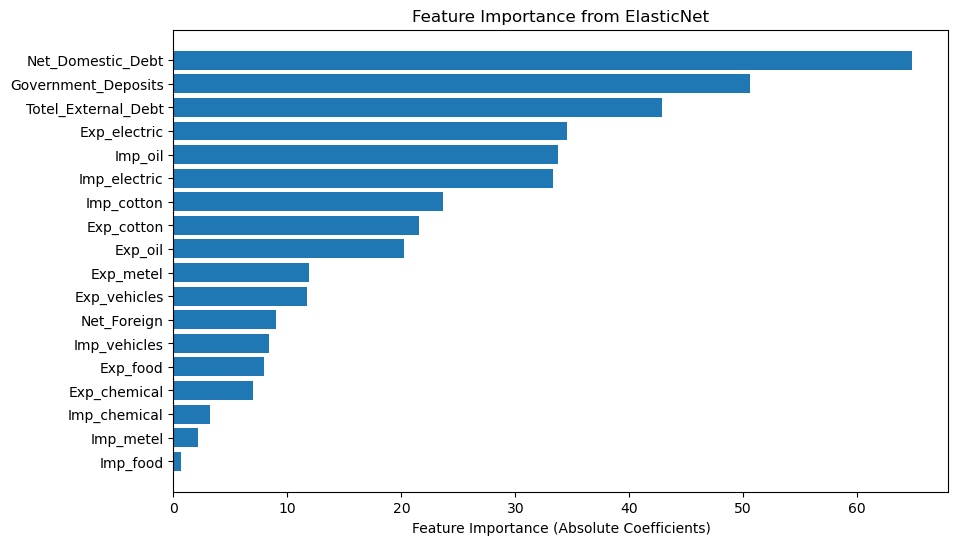

In [27]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute Importance'])
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.title('Feature Importance from ElasticNet')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

**I will select most importance features that effect GDP
('Exp_electric', 'Imp_cotton', 'Imp_oil', 'Government_Deposits', 'Totel_External_Debt', 'Net_Domestic_Debt')**

**then I will save this in new csv file to test in forecast and prediction**

In [29]:
# Adding the current index as a new column using .loc to avoid the warning
df.loc[:, 'Date']=df.index

# Reordering columns to put the index first
df_importance = df[['GDP_mp', 'Exp_electric', 'Imp_cotton', 'Imp_oil', 'Government_Deposits', 'Totel_External_Debt', 'Net_Domestic_Debt']]

df_importance.head()

,GDP_mp,Exp_electric,Imp_cotton,Imp_oil,Government_Deposits,Totel_External_Debt,Net_Domestic_Debt
Date,,,,,,,
30/09/2005,153.5,123.1,184.9,1152.8,85937,29674.4,355094
31/12/2005,147.4,33.5,194.2,1406.0,86364,29691.6,357643
31/03/2006,153.3,108.9,208.2,1189.1,86752,28938.6,374034
30/06/2006,163.5,60.3,205.7,1611.3,82135,29592.6,387719
30/09/2006,185.9,96.8,257.4,1396.4,83403,28950.9,446634


In [31]:
#save the importance features on new csv file
df_importance.to_csv('df_importance.csv', index=True)

# 4. Cointegration Test

* This test is used to determine whether there are cointegrating relationships between multiple time series. The test is commonly applied in economics and finance to check for long-term equilibrium relationships between variables, such as GDP, imports, exports, etc.

In [33]:
df_importance=pd.read_csv('df_importance.csv',index_col=0)
df_importance.head(2)

,GDP_mp,Exp_electric,Imp_cotton,Imp_oil,Government_Deposits,Totel_External_Debt,Net_Domestic_Debt
Date,,,,,,,
30/09/2005,153.5,123.1,184.9,1152.8,85937,29674.4,355094
31/12/2005,147.4,33.5,194.2,1406.0,86364,29691.6,357643


In [34]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,3), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_importance)



Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
GDP_mp ::  371.919   > 111.7797  =>   True
Exp_electric ::  227.984   > 83.9383   =>   True
Imp_cotton ::  140.456   > 60.0627   =>   True
Imp_oil ::  88.534    > 40.1749   =>   True
Government_Deposits ::  51.21     > 24.2761   =>   True
Totel_External_Debt ::  23.464    > 12.3212   =>   True
Net_Domestic_Debt ::  3.757     > 4.1296    =>   False


**This result indicates that, although the variables may fluctuate in the short term, they are bound by a long-term relationship, which is valuable information for economic analysis, particularly in fields like forecasting or policy analysis**